In [3]:
import json
import pandas as pd
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets

from src.embedding_model import EmbeddingModel
from src.recommender import RuleBasedRecommender

# Load data
with open("zaps/zap_database.json", "r", encoding="utf-8") as f:
    user_data = json.load(f)

# Initialize models
embedding_model = EmbeddingModel()
recommender = RuleBasedRecommender("zaps/zap_database.json")


# Widgets
task_input = widgets.Text(
    value='',
    placeholder='e.g. Save email attachments to Google Drive',
    description='Your Task:',
    layout=widgets.Layout(width='80%')
)

submit_button = widgets.Button(
    description='Submit',
    button_style='success',
    tooltip='Click to get Zap suggestions',
    icon='check'
)

clear_button = widgets.Button(
    description='Clear',
    button_style='warning',
    tooltip='Clear all inputs and results',
    icon='refresh'
)

top_k_slider = widgets.IntSlider(
    value=5,
    min=1,
    max=10,
    step=1,
    description='Top K:',
    continuous_update=False,
    style={'description_width': '60px'},
    layout=widgets.Layout(width='50%')
)

output_area = widgets.Output()

# Handlers
def on_submit(_):
    with output_area:
        clear_output()
        user_query = task_input.value.strip()
        top_k = top_k_slider.value

        if not user_query:
            display(Markdown("⚠️ **Please enter a valid task.**"))
            return

        display(Markdown(f"### 🔍 Finding Zaps similar to: `{user_query}`"))

        recommendations = recommender.recommend(user_query, top_k=top_k)

        if not recommendations:
            display(Markdown("❌ **No recommendations found.**"))
        else:
            display(Markdown("### ✅ Top Zap Suggestions:"))
            df = pd.DataFrame([
    {"Zap": rec["description"], "Similarity Score": round(rec["score"], 4)}
    for rec in recommendations
])

            df["Similarity Score"] = df["Similarity Score"].round(2)
            display(df)

def on_clear(_):
    task_input.value = ''
    output_area.clear_output()

# Link buttons
submit_button.on_click(on_submit)
clear_button.on_click(on_clear)

# Layout
display(Markdown("## 🤖 Enter a task you do frequently"))
display(widgets.VBox([
    task_input,
    widgets.HBox([submit_button, clear_button]),
    top_k_slider,
    output_area
]))


AttributeError: 'str' object has no attribute 'fit'

In [3]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- Widgets ---
task_input = widgets.Text(
    value="",
    placeholder="e.g. Save email attachments to Google Drive",
    description="Your Task:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width="80%")
)

top_k_input = widgets.IntText(
    value=5,
    description="Top K:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width="15%")
)

submit_button = widgets.Button(description="Submit", button_style="success", layout=widgets.Layout(width="120px"))
clear_button = widgets.Button(description="Clear", button_style="warning", layout=widgets.Layout(width="120px"))

# Output areas
output_area = widgets.Output(layout={'border': '1px solid gray', 'padding': '10px', 'width': '95%'})
history_area = widgets.Output(layout={'border': '1px solid #ccc', 'padding': '10px', 'width': '95%'})

# History storage
query_history = []

# --- Functions ---
def on_submit(b):
    task = task_input.value.strip()
    top_k = top_k_input.value
    
    if not task:
        with output_area:
            clear_output()
            print("⚠️ Please enter a task.")
        return
    
    # Store query in history (keep last 5)
    query_history.append(task)
    if len(query_history) > 5:
        query_history.pop(0)
    
    # Fake recommendations for now
    recommendations = [f"Zap Suggestion {i+1} for '{task}'" for i in range(top_k)]
    
    # Show output
    with output_area:
        clear_output()
        print("✅ Recommended Zaps:")
        for r in recommendations:
            print("-", r)
    
    # Update history
    with history_area:
        clear_output()
        print("📜 Query History (last 5):")
        for q in query_history:
            print("-", q)

def on_clear(b):
    task_input.value = ""
    top_k_input.value = 5  # Reset to default
    with output_area:
        clear_output()
        print("🧹 Cleared. Ready for a new task.")
    with history_area:
        clear_output()

# Bind events
submit_button.on_click(on_submit)
clear_button.on_click(on_clear)

# --- Layout ---
ui = widgets.VBox([
    widgets.HTML("<h3>🤖 Enter a task you do frequently</h3>"),
    task_input,
    top_k_input,
    widgets.HBox([submit_button, clear_button], layout=widgets.Layout(justify_content="flex-start", padding="10px 0")),
    widgets.HTML("<b>Output:</b>"),
    output_area,
    widgets.HTML("<b>History:</b>"),
    history_area
])

display(ui)

In [ ]:
def app_interface():
    print("🤖 Enter a task you do frequently")
    task = input("Your Task:\n e.g. Save email attachments to Google Drive\n")
    
    top_k = input("Top K:\n")
    if not top_k.isdigit():
        top_k = 5  # default
    else:
        top_k = int(top_k)

    print("\nOutput:")
    print("History:")
    
    # (for now just showing task and top_k for demo)
    print(f"Task Entered: {task}")
    print(f"Top K Value: {top_k}")

# run
app_interface()


🤖 Enter a task you do frequently


In [1]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output
import random

class EmbeddingModel:
    def __init__(self):
        pass

    def get_embedding(self, text):
        random.seed(hash(text) % 10000)
        return [random.random() for _ in range(10)]

class RuleBasedRecommender:
    def __init__(self, embedding_model):
        self.embedding_model = embedding_model
        self.zap_library = [
            "Save Gmail attachments to Google Drive",
            "Post new RSS feed items to Twitter",
            "Send Slack message for new Trello card",
            "Backup contacts to Google Sheets",
            "Create calendar event from email",
            "Send Discord alert for GitHub issue",
            "Log new orders in Excel",
            "Email notification for failed server ping",
            "Save Tweets with hashtag to Notion",
            "Update CRM when new lead is added"
        ]

    def recommend(self, task, top_k=5):
        task_vec = self.embedding_model.get_embedding(task)
        scored = []
        for zap in self.zap_library:
            zap_vec = self.embedding_model.get_embedding(zap)
            score = self.cosine_similarity(task_vec, zap_vec)
            scored.append((zap, score))
        scored.sort(key=lambda x: x[1], reverse=True)
        return scored[:top_k]

    def cosine_similarity(self, v1, v2):
        dot = sum(a*b for a, b in zip(v1, v2))
        norm1 = sum(a*a for a in v1) ** 0.5
        norm2 = sum(b*b for b in v2) ** 0.5
        return dot / (norm1 * norm2 + 1e-9)

embedding_model = EmbeddingModel()
recommender = RuleBasedRecommender(embedding_model)

# Widgets
task_input = widgets.Text(
    value="",
    placeholder="e.g. Save email attachments to Google Drive",
    description="Your Task:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width="80%")
)

top_k_input = widgets.IntText(
    value=5,
    description="Top K:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width="15%")
)

submit_button = widgets.Button(description="Submit", button_style="success", layout=widgets.Layout(width="120px"))
clear_button = widgets.Button(description="Clear", button_style="warning", layout=widgets.Layout(width="120px"))

output_area = widgets.Output(layout={'border': '1px solid gray', 'padding': '10px', 'width': '95%'})
history_area = widgets.Output(layout={'border': '1px solid #ccc', 'padding': '10px', 'width': '95%'})

query_history = []

def on_submit(b):
    task = task_input.value.strip()
    top_k = top_k_input.value
    
    if not task:
        with output_area:
            clear_output()
            print("⚠️ Please enter a task.")
        return
    
    query_history.append(task)
    if len(query_history) > 5:
        query_history.pop(0)

    recommendations = recommender.recommend(task, top_k)
    
    with output_area:
        clear_output()
        print("✅ Recommended Zaps:")
        for zap, score in recommendations:
            print(f"- {zap} (similarity: {score:.2f})")
    
    with history_area:
        clear_output()
        print("📜 Query History (last 5):")
        for q in query_history:
            print("-", q)


def on_clear(b):
    task_input.value = ""
    top_k_input.value = 5
    with output_area:
        clear_output()
        print("🧹 Cleared. Ready for a new task.")
    with history_area:
        clear_output()


submit_button.on_click(on_submit)
clear_button.on_click(on_clear)

ui = widgets.VBox([
    widgets.HTML("<h3>🤖 Enter a task you do frequently</h3>"),
    task_input,
    top_k_input,
    widgets.HBox([submit_button, clear_button], layout=widgets.Layout(justify_content="flex-start", padding="10px 0")),
    widgets.HTML("<b>Output:</b>"),
    output_area,
    widgets.HTML("<b>History:</b>"),
    history_area
])

display(ui)


In [ ]:
import json
from src.embedding_model import EmbeddingModel
from src.recommender import RuleBasedRecommender

# Load sample user data
with open("data/sample_user_data.json", "r") as f:
    user_data = json.load(f)

# Initialize model + recommender
embedding_model = EmbeddingModel()
recommender = RuleBasedRecommender(embedding_model)

# Get user input
user_query = input("🔍 Describe what you want to automate: ")

# Generate recommendations
recommendations = recommender.recommend(user_query, user_data, top_k=5)

# Business Value Dictionary
business_value = {
    "Save Time": "This Zap reduces repetitive manual work (like copy-pasting data).",
    "Automation": "It automates workflows so you can focus on higher-value tasks.",
    "Error Reduction": "Removes human mistakes by standardizing repetitive steps.",
    "Scalability": "Lets your process run 24/7 without extra effort."
}

# Fake time-saving estimates (example: 5-20 mins per task)
time_saving_map = {
    0: "⏳ Saves ~15 mins/day",
    1: "⏳ Saves ~10 mins/day",
    2: "⏳ Saves ~5 mins/day",
    3: "⏳ Saves ~20 mins/week",
    4: "⏳ Saves ~30 mins/month"
}

# Show results
print("\n✨ Recommended Zaps for You ✨\n")
for i, (zap, score) in enumerate(recommendations):
    print(f"⚡ {zap}  (score: {score:.2f})")
    print(f"   {time_saving_map.get(i, '⏳ Saves time daily')}")
    for k, v in business_value.items():
        print(f"   ✅ {k}: {v}")
    print("-" * 50)


In [1]:
import json
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

class EmbeddingModel:
    def __init__(self, model_name="all-MiniLM-L6-v2"):
        self.model = SentenceTransformer(model_name)
    def get_embedding(self, text):
        return self.model.encode([text])[0]

class HybridRecommender:
    def __init__(self, embedding_model):
        self.embedding_model = embedding_model
    def recommend(self, user_data, available_zaps, top_n=5):
        user_actions = [action["action"] for action in user_data]
        user_text = " ".join(user_actions)
        user_vector = self.embedding_model.get_embedding(user_text)
        recommendations = []
        for zap in available_zaps:
            zap_vector = self.embedding_model.get_embedding(zap["description"])
            similarity = cosine_similarity([user_vector], [zap_vector])[0][0]
            score = (0.7 * similarity) + (0.3 * zap["business_value"])
            recommendations.append((zap["name"], score))
        recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)
        return recommendations[:top_n]

with open("data/sample_user_data.json", "r") as f:
    user_data = json.load(f)

available_zaps = [
    {"name": "Slack Notification", "description": "Send message to Slack when new task created", "business_value": 0.9},
    {"name": "Google Sheets Update", "description": "Update Google Sheet when form is submitted", "business_value": 0.7},
    {"name": "Email Alert", "description": "Send email when a critical error occurs", "business_value": 0.95},
    {"name": "CRM Update", "description": "Update CRM when a lead is captured", "business_value": 0.85},
    {"name": "Calendar Event", "description": "Create calendar event from task deadline", "business_value": 0.6}
]

embedding_model = EmbeddingModel()
recommender = HybridRecommender(embedding_model)
recommendations = recommender.recommend(user_data, available_zaps, top_n=5)

for zap, score in recommendations:
    print(f"{zap}: {score:.4f}")



Google Sheets Update: 0.4688
Slack Notification: 0.4589
Email Alert: 0.4321
CRM Update: 0.4260
Calendar Event: 0.3641


In [ ]:
def format_output(zaps, mode="business"):
    if mode == "simple":
        return [zap["zap"] for zap in zaps]
    elif mode == "scores":
        return [f"{zap['zap']} (score: {zap['score']:.2f})" for zap in zaps]
    elif mode == "business":
        return [f"{zap['zap']} → Value: {zap['business_value']}" for zap in zaps]
    elif mode == "detailed":
        return [
            {
                "Zap": zap["zap"],
                "Score": round(zap["score"], 2),
                "Business Value": zap["business_value"],
                "Why Suggested": zap.get("reason", "Improves efficiency")
            }
            for zap in zaps
        ]

user_input = input("Enter your workflow/task: ")
results = recommender.recommend(user_input, top_k=5)
print("\n--- Simple Suggestions ---")
print(format_output(results, "simple"))
print("\n--- With Scores ---")
print(format_output(results, "scores"))
print("\n--- With Business Value ---")
print(format_output(results, "business"))
print("\n--- Advanced Detailed Suggestions ---")
for r in format_output(results, "detailed"):
    print(r)


# New

In [4]:
import json
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

class EmbeddingModel:
    def __init__(self, model_name="all-MiniLM-L6-v2"):
        self.model = SentenceTransformer(model_name)
    def get_embedding(self, text):
        return self.model.encode([text])[0]

class HybridRecommender:
    def __init__(self, embedding_model):
        self.embedding_model = embedding_model
    def recommend(self, user_data, available_zaps, top_n=5):
        user_actions = [action["action"] for action in user_data]
        user_text = " ".join(user_actions)
        user_vector = self.embedding_model.get_embedding(user_text)
        recommendations = []
        for zap in available_zaps:
            zap_vector = self.embedding_model.get_embedding(zap["description"])
            similarity = cosine_similarity([user_vector], [zap_vector])[0][0]
            score = (0.7 * similarity) + (0.3 * zap["business_value"])
            recommendations.append((zap, score))
        recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)
        return recommendations[:top_n]

with open("data/sample_user_data.json", "r") as f:
    user_data = json.load(f)

available_zaps = [
    {"name": "Slack Notification", "description": "Send message to Slack when new task created", "business_value": 0.9},
    {"name": "Google Sheets Update", "description": "Update Google Sheet when form is submitted", "business_value": 0.7},
    {"name": "Email Alert", "description": "Send email when a critical error occurs", "business_value": 0.95},
    {"name": "CRM Update", "description": "Update CRM when a lead is captured", "business_value": 0.85},
    {"name": "Calendar Event", "description": "Create calendar event from task deadline", "business_value": 0.6}
]

business_value_text = {
    "Automation": "Automates workflows so you can focus on higher-value tasks.",
    "Error Reduction": "Removes mistakes by standardizing steps.",
    "Time Saving": "Reduces repetitive manual work.",
    "Scalability": "Lets process run 24/7 without effort."
}

time_saving_map = {
    0: "⏳ Saves ~15 mins/day",
    1: "⏳ Saves ~10 mins/day",
    2: "⏳ Saves ~5 mins/day",
    3: "⏳ Saves ~20 mins/week",
    4: "⏳ Saves ~30 mins/month"
}

embedding_model = EmbeddingModel()
recommender = HybridRecommender(embedding_model)
recommendations = recommender.recommend(user_data, available_zaps, top_n=5)

print("\n✨ Recommended Zaps ✨\n")
for i, (zap, score) in enumerate(recommendations):
    print(f"⚡ {zap} (score: {score:.2f})")
    print(f"   {time_saving_map.get(i, '⏳ Saves time daily')}")
    for k, v in business_value_text.items():
        print(f"   ✅ {k}: {v}")
    print("-" * 50)




✨ Recommended Zaps ✨

⚡ {'name': 'Google Sheets Update', 'description': 'Update Google Sheet when form is submitted', 'business_value': 0.7} (score: 0.47)
   ⏳ Saves ~15 mins/day
   ✅ Automation: Automates workflows so you can focus on higher-value tasks.
   ✅ Error Reduction: Removes mistakes by standardizing steps.
   ✅ Time Saving: Reduces repetitive manual work.
   ✅ Scalability: Lets process run 24/7 without effort.
--------------------------------------------------
⚡ {'name': 'Slack Notification', 'description': 'Send message to Slack when new task created', 'business_value': 0.9} (score: 0.46)
   ⏳ Saves ~10 mins/day
   ✅ Automation: Automates workflows so you can focus on higher-value tasks.
   ✅ Error Reduction: Removes mistakes by standardizing steps.
   ✅ Time Saving: Reduces repetitive manual work.
   ✅ Scalability: Lets process run 24/7 without effort.
--------------------------------------------------
⚡ {'name': 'Email Alert', 'description': 'Send email when a critical 

In [6]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

class EmbeddingModel:
    def __init__(self, model_name="all-MiniLM-L6-v2"):
        self.model = SentenceTransformer(model_name)
    def get_embedding(self, text):
        return self.model.encode([text])[0]

class HybridRecommender:
    def __init__(self, embedding_model, available_zaps):
        self.embedding_model = embedding_model
        self.available_zaps = available_zaps
    def recommend(self, task, top_k=5):
        task_vec = self.embedding_model.get_embedding(task)
        scored = []
        for zap in self.available_zaps:
            zap_vec = self.embedding_model.get_embedding(zap["description"])
            similarity = cosine_similarity([task_vec], [zap_vec])[0][0]
            score = (0.7 * similarity) + (0.3 * zap["business_value"])
            scored.append((zap["name"], score))
        scored.sort(key=lambda x: x[1], reverse=True)
        return scored[:top_k]

with open("data/sample_user_data.json", "r") as f:
    _ = json.load(f)

available_zaps = [
    {"name": "Slack Notification", "description": "Send message to Slack when new task created", "business_value": 0.9},
    {"name": "Google Sheets Update", "description": "Update Google Sheet when form is submitted", "business_value": 0.7},
    {"name": "Email Alert", "description": "Send email when a critical error occurs", "business_value": 0.95},
    {"name": "CRM Update", "description": "Update CRM when a lead is captured", "business_value": 0.85},
    {"name": "Calendar Event", "description": "Create calendar event from task deadline", "business_value": 0.6}
]

embedding_model = EmbeddingModel()
recommender = HybridRecommender(embedding_model, available_zaps)

task_input = widgets.Text(value="", placeholder="e.g. Save email attachments to Google Drive", description="Your Task:")
top_k_input = widgets.IntText(value=5, description="Top K:")
submit_button = widgets.Button(description="Submit", button_style="success")
clear_button = widgets.Button(description="Clear", button_style="warning")
output_area = widgets.Output()
history_area = widgets.Output()
query_history = []

def on_submit(b):
    task = task_input.value.strip()
    top_k = top_k_input.value
    if not task:
        with output_area:
            clear_output()
            print("⚠️ Please enter a task.")
        return
    query_history.append(task)
    if len(query_history) > 5:
        query_history.pop(0)
    recommendations = recommender.recommend(task, top_k)
    with output_area:
        clear_output()
        print("✅ Recommended Zaps:")
        for zap, score in recommendations:
            print(f"- {zap} (score: {score:.2f})")
    with history_area:
        clear_output()
        print("📜 Query History (last 5):")
        for q in query_history:
            print("-", q)

def on_clear(b):
    task_input.value = ""
    top_k_input.value = 5
    with output_area:
        clear_output()
        print("🧹 Cleared. Ready for a new task.")
    with history_area:
        clear_output()

submit_button.on_click(on_submit)
clear_button.on_click(on_clear)

ui = widgets.VBox([
    widgets.HTML("<h3>🤖 Enter a task you do frequently</h3>"),
    task_input,
    top_k_input,
    widgets.HBox([submit_button, clear_button]),
    widgets.HTML("<b>Output:</b>"),
    output_area,
    widgets.HTML("<b>History:</b>"),
    history_area
])
display(ui)


In [8]:
import matplotlib.pyplot as plt
import json

results = recommender.recommend("Save email attachments", available_zaps, top_n=5)

data = [{"Zap": zap, "Score": float(f"{score:.4f}")} for zap, score in results]
with open("zap_recommendations.json", "w") as f:
    json.dump(data, f, indent=2)

zaps = [d["Zap"] for d in data]
scores = [d["Score"] for d in data]

plt.barh(zaps, scores)
plt.xlabel("Relevance Score")
plt.title("Top Recommended Zaps")
plt.gca().invert_yaxis()
plt.show()


TypeError: HybridRecommender.recommend() got an unexpected keyword argument 'top_n'

In [10]:
Final_Score = α * Rule_Score + β * Similarity_Score + γ * Business_Value_Score + δ * Frequency_Score


NameError: name 'α' is not defined

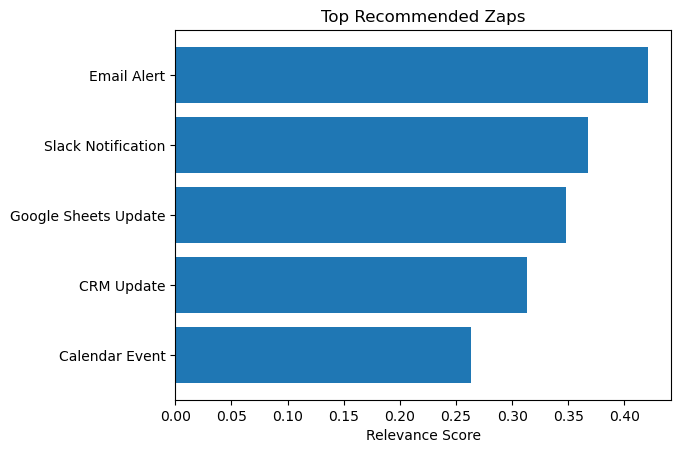

⚡ Email Alert — Score: 0.4206
⚡ Slack Notification — Score: 0.3675
⚡ Google Sheets Update — Score: 0.3483
⚡ CRM Update — Score: 0.3132
⚡ Calendar Event — Score: 0.2634


In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

class EmbeddingModel:
    def __init__(self, model_name="all-MiniLM-L6-v2"):
        self.model = SentenceTransformer(model_name)
    def get_embedding(self, text):
        return self.model.encode([text])[0]

class HybridRecommender:
    def __init__(self, embedding_model):
        self.embedding_model = embedding_model
    def recommend(self, user_input, available_zaps, top_n=5):
        if isinstance(user_input, str):
            user_text = user_input
        elif isinstance(user_input, list):
            user_text = " ".join(user_input)
        elif isinstance(user_input, dict) and "action" in user_input:
            user_text = user_input["action"]
        else:
            raise ValueError("Input must be a string, list of actions, or dict with 'action'.")
        user_vector = self.embedding_model.get_embedding(user_text)
        recommendations = []
        for zap in available_zaps:
            zap_vector = self.embedding_model.get_embedding(zap["description"])
            similarity = cosine_similarity([user_vector], [zap_vector])[0][0]
            score = (0.7 * similarity) + (0.3 * zap["business_value"])
            recommendations.append((zap["name"], score))
        recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)
        return recommendations[:top_n]

with open("data/sample_user_data.json", "r") as f:
    user_data = json.load(f)

available_zaps = [
    {"name": "Slack Notification", "description": "Send message to Slack when new task created", "business_value": 0.9},
    {"name": "Google Sheets Update", "description": "Update Google Sheet when form is submitted", "business_value": 0.7},
    {"name": "Email Alert", "description": "Send email when a critical error occurs", "business_value": 0.95},
    {"name": "CRM Update", "description": "Update CRM when a lead is captured", "business_value": 0.85},
    {"name": "Calendar Event", "description": "Create calendar event from task deadline", "business_value": 0.6}
]

embedding_model = EmbeddingModel()
recommender = HybridRecommender(embedding_model)

results = recommender.recommend("Save email attachments to Google Drive", available_zaps, top_n=5)

data = [{"Zap": zap, "Score": float(f"{score:.4f}")} for zap, score in results]
with open("zap_recommendations.json", "w") as f:
    json.dump(data, f, indent=2)

zaps = [d["Zap"] for d in data]
scores = [d["Score"] for d in data]

plt.barh(zaps, scores)
plt.xlabel("Relevance Score")
plt.title("Top Recommended Zaps")
plt.gca().invert_yaxis()
plt.show()

for d in data:
    print(f"⚡ {d['Zap']} — Score: {d['Score']}")
